In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import numpy as np

def plot_ts_acf_pacf(data, lags=40):
    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

    ax_ts = fig.add_subplot(gs[0, :])
    ax_ts.plot(data, color='blue')
    ax_ts.set_title("Série temporelle")

    ax_acf = fig.add_subplot(gs[1, 0])
    plot_acf(data, lags=lags, ax=ax_acf)
    ax_acf.set_title("Autocorrelation Function (ACF)")

    ax_pacf = fig.add_subplot(gs[1, 1])
    plot_pacf(data, lags=lags, ax=ax_pacf)
    ax_pacf.set_title("Partial Autocorrelation Function (PACF)")

    plt.tight_layout()
    plt.show()


## AR processes

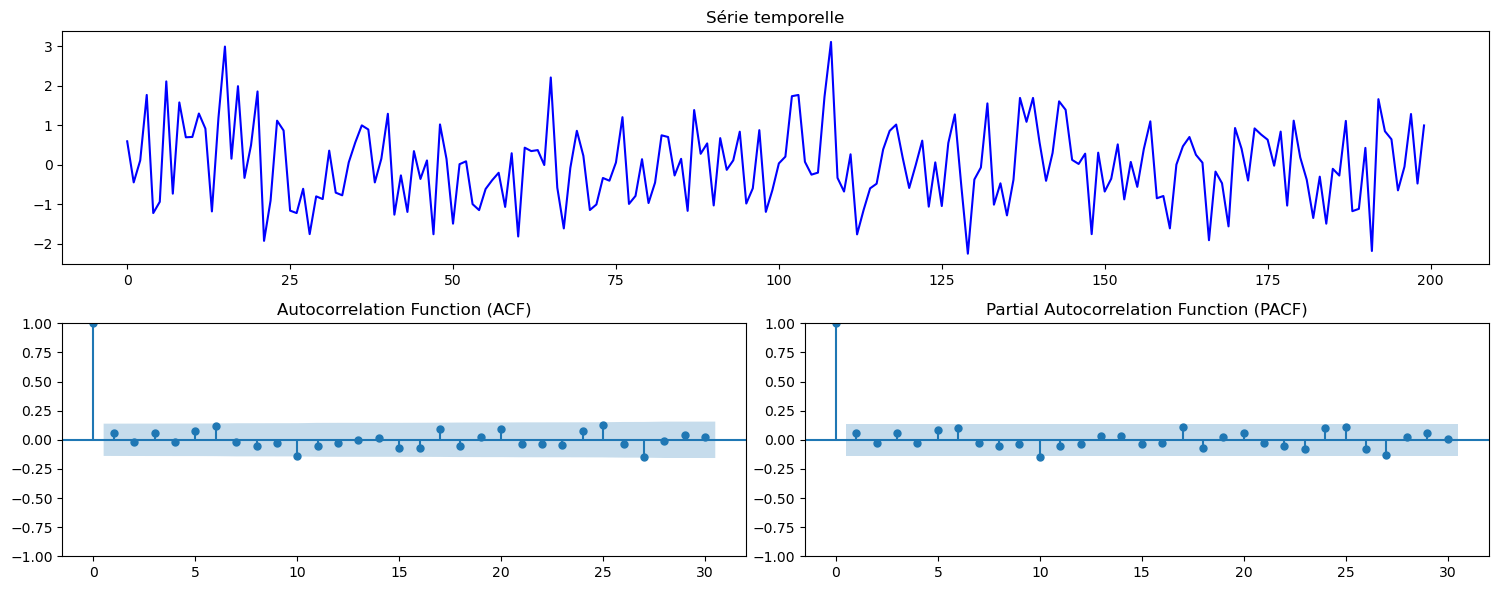

In [4]:
phis = np.array([0])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=200)
plot_ts_acf_pacf(ts, lags=30)

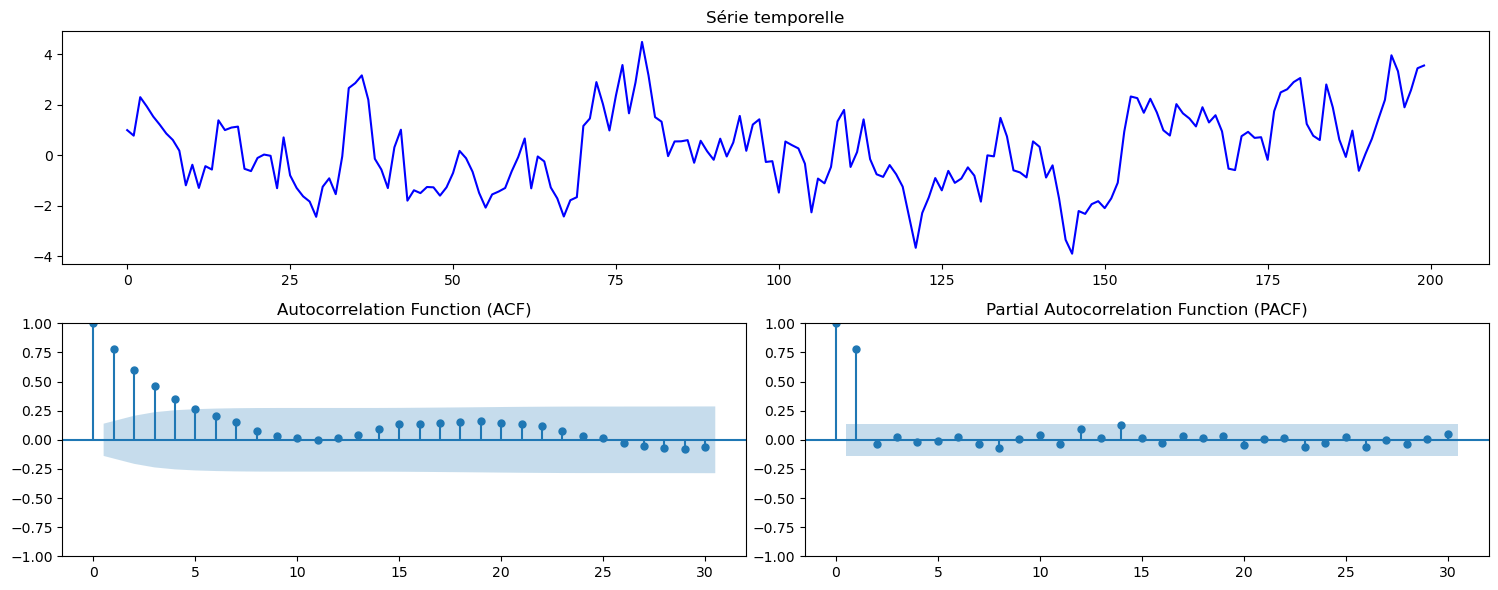

In [6]:
phis = np.array([0.8])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=200)
plot_ts_acf_pacf(ts, lags=30)

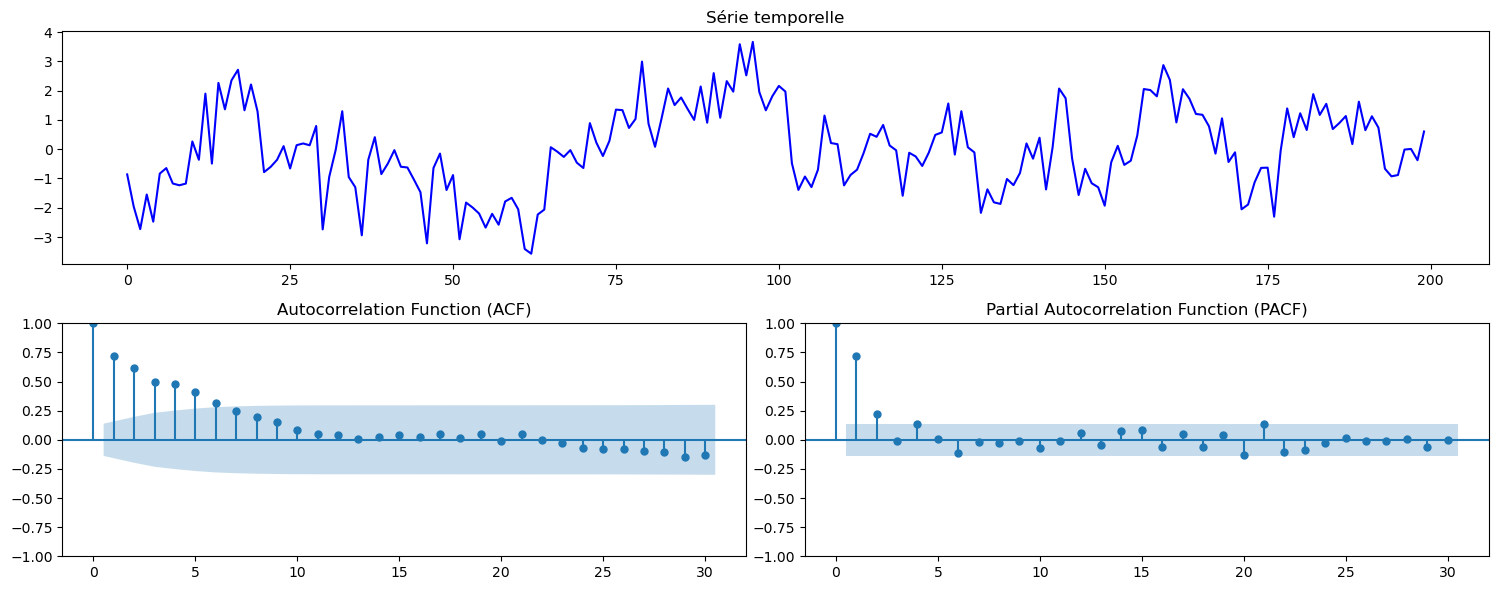

In [9]:
phis = np.array([0.5, 0.3])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=200)
plot_ts_acf_pacf(ts, lags=30)

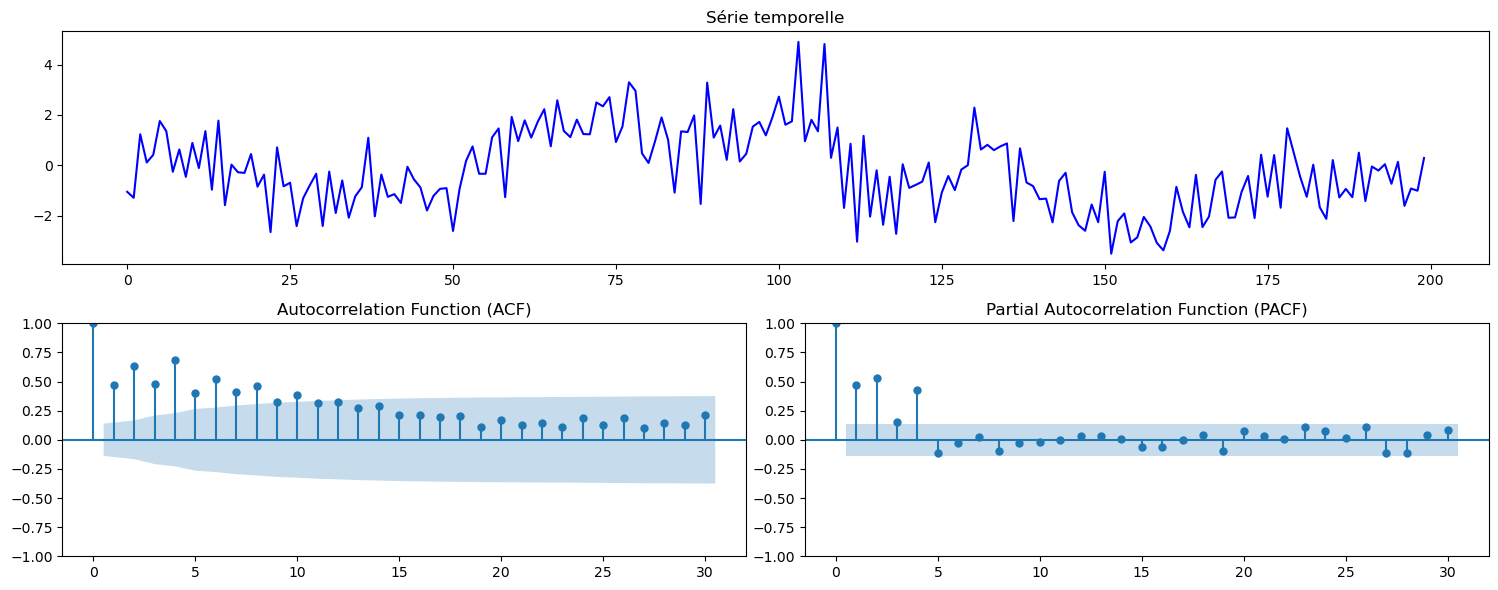

In [12]:
phis = np.array([0.1, 0.3, 0.1, 0.4])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=200)
plot_ts_acf_pacf(ts, lags=30)

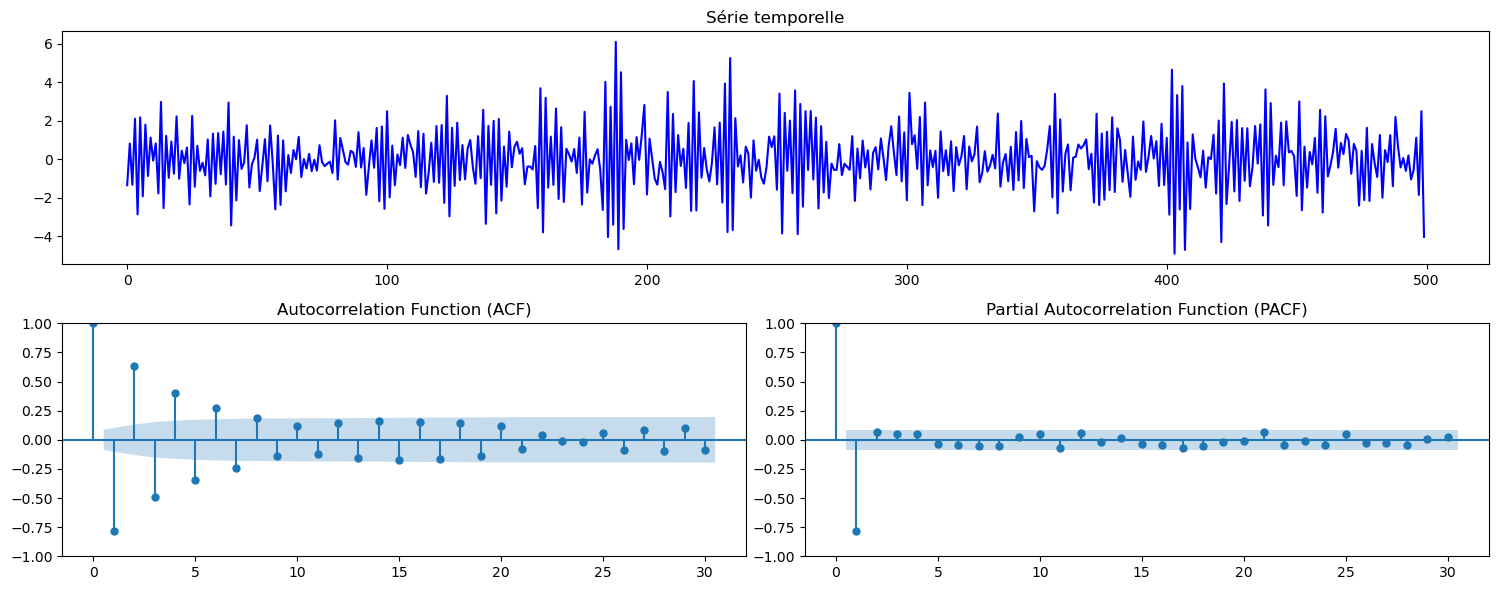

In [29]:
phis = np.array([-0.8])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=500)
plot_ts_acf_pacf(ts, lags=30)

## MA processes

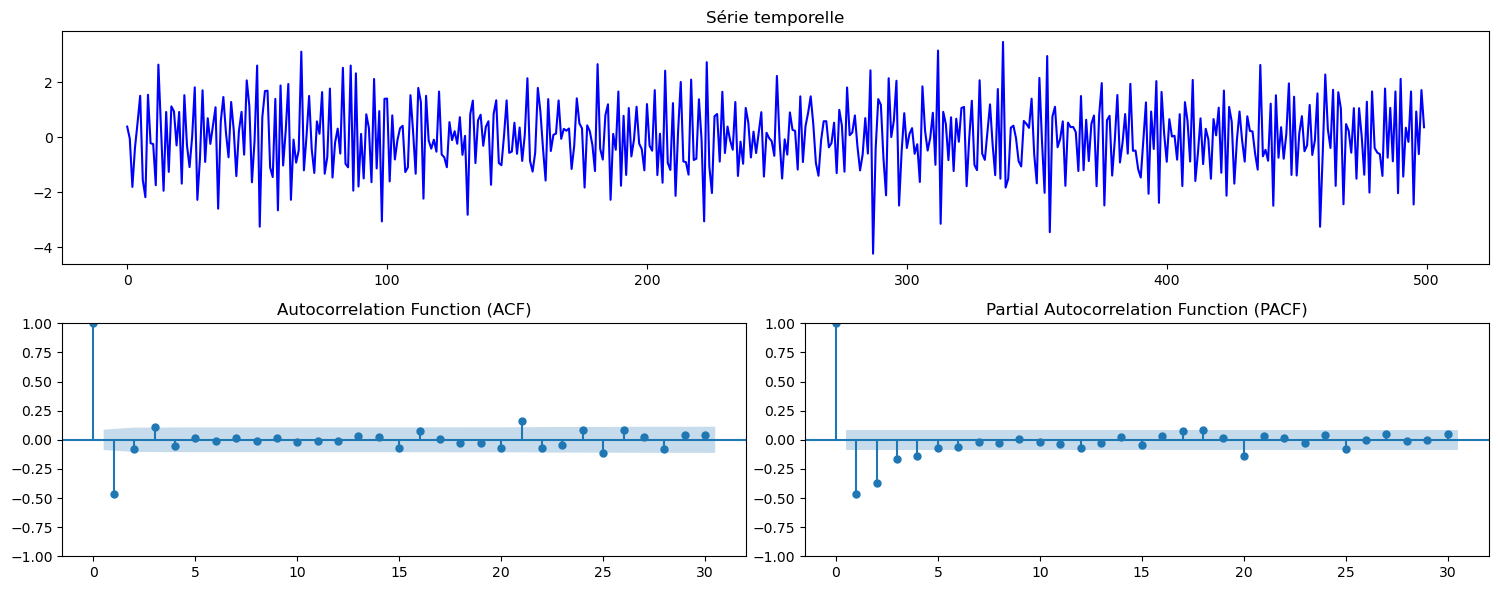

In [ ]:
thetas = np.array([0.7])
ma_params = np.r_[1, thetas]  # statsmodels uses the sign convention

ts = ArmaProcess(ma=ma_params).generate_sample(nsample=500)
plot_ts_acf_pacf(ts, lags=30)

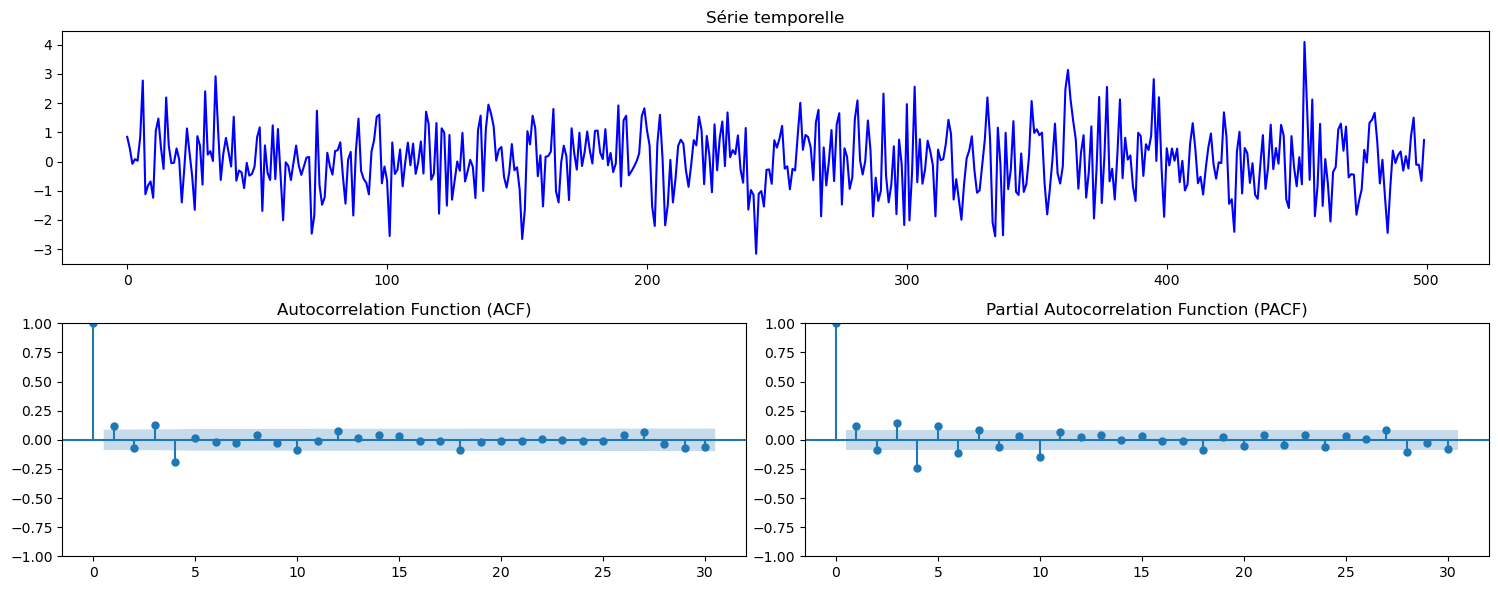

In [45]:
thetas = np.array([0.3, -0.2, 0.2, -0.2])
ma_params = np.r_[1, thetas]  # statsmodels uses the sign convention

ts = ArmaProcess(ma=ma_params).generate_sample(nsample=500)
plot_ts_acf_pacf(ts, lags=30)

## ARMA processes

## ARIMA processes

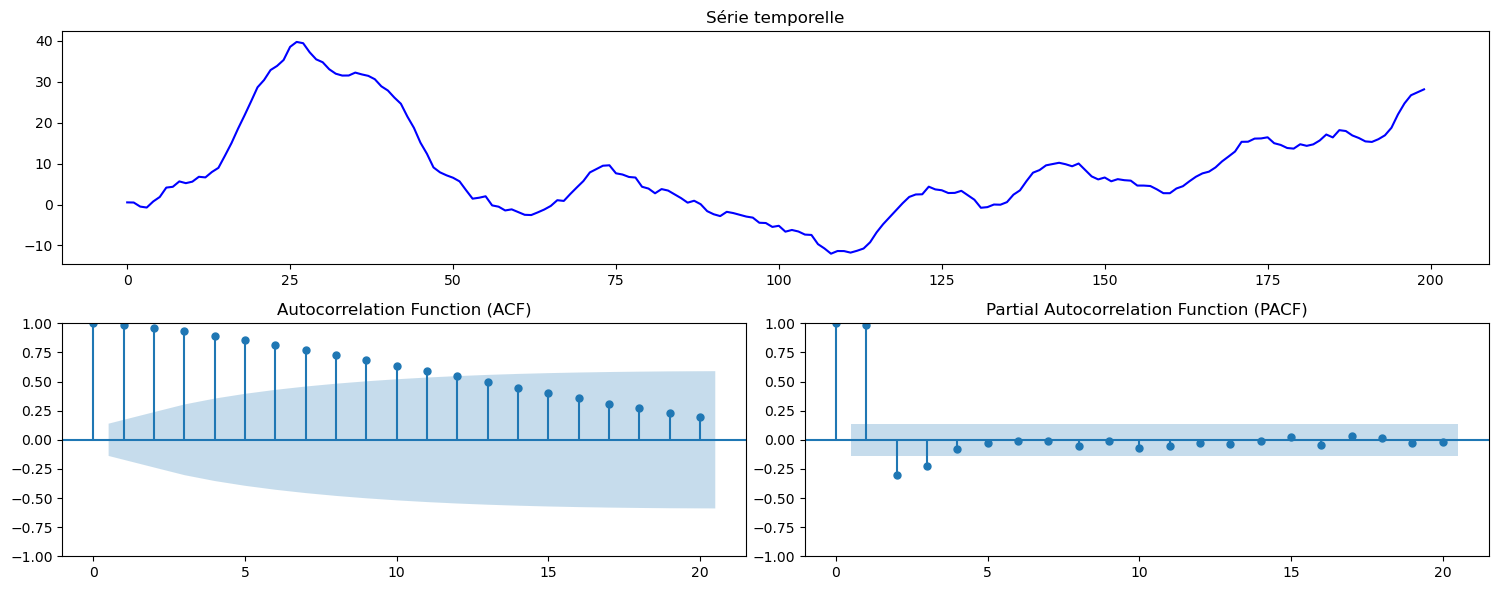

In [46]:
phis = np.array([0.5, 0.3])
ar_params = np.r_[1, -phis]  # statsmodels uses the sign convention

ts = ArmaProcess(ar=ar_params).generate_sample(nsample=200)
ts_non_stat = ts.cumsum()
plot_ts_acf_pacf(ts_non_stat, lags=20)

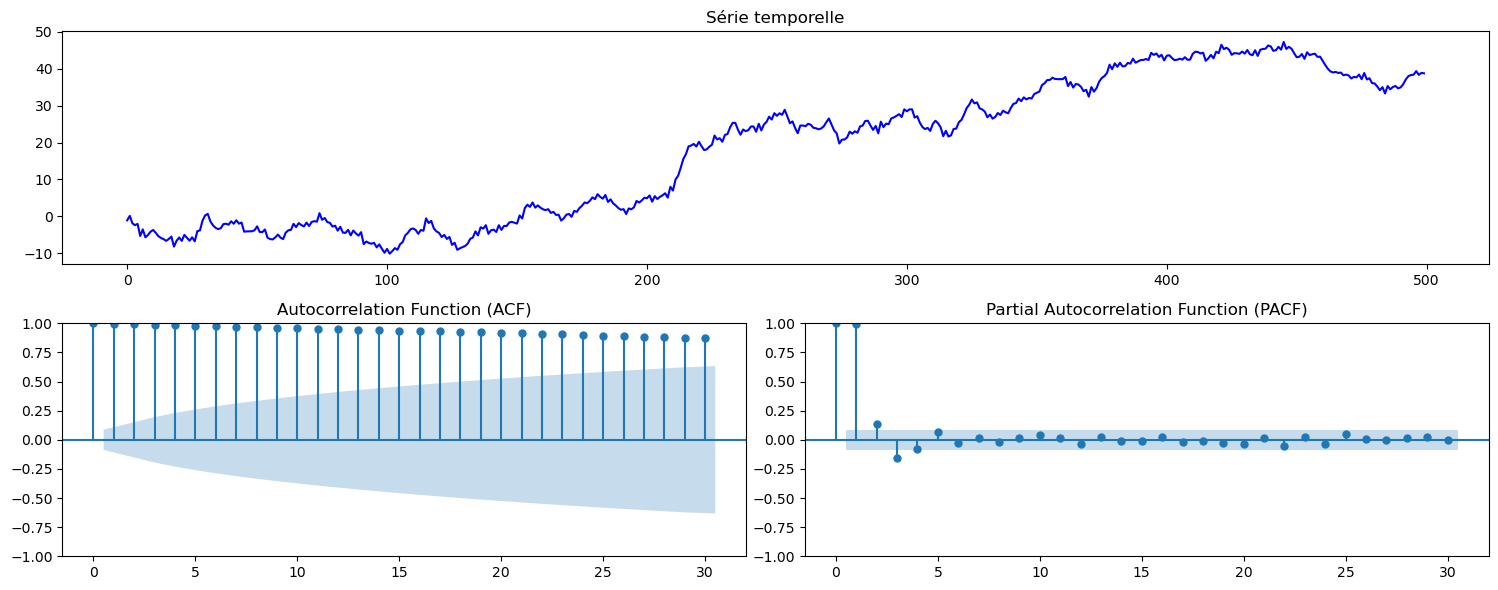

In [54]:
thetas = np.array([-0.2, 0.5])
ma_params = np.r_[1, thetas]  # statsmodels uses the sign convention

ts = ArmaProcess(ma=ma_params).generate_sample(nsample=500)
ts_non_stat = ts.cumsum()
plot_ts_acf_pacf(ts_non_stat, lags=30)

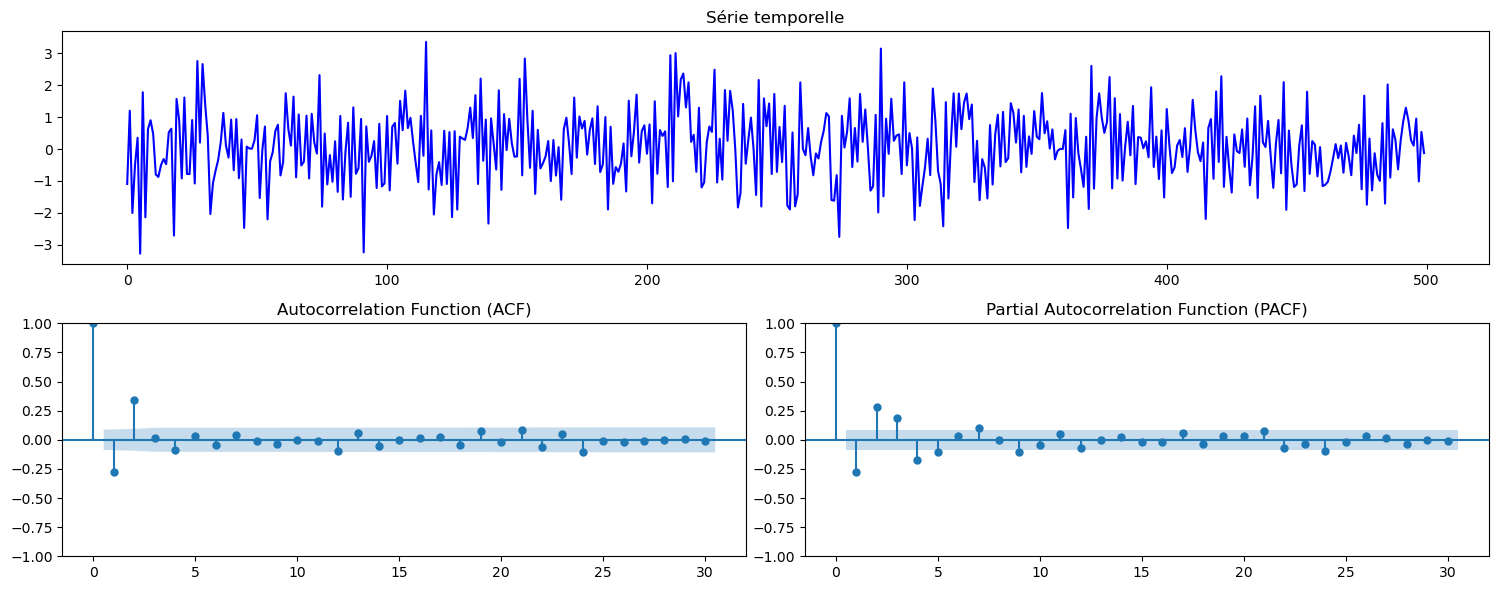

In [55]:
plot_ts_acf_pacf(ts, lags=30)

## SARIMA processes

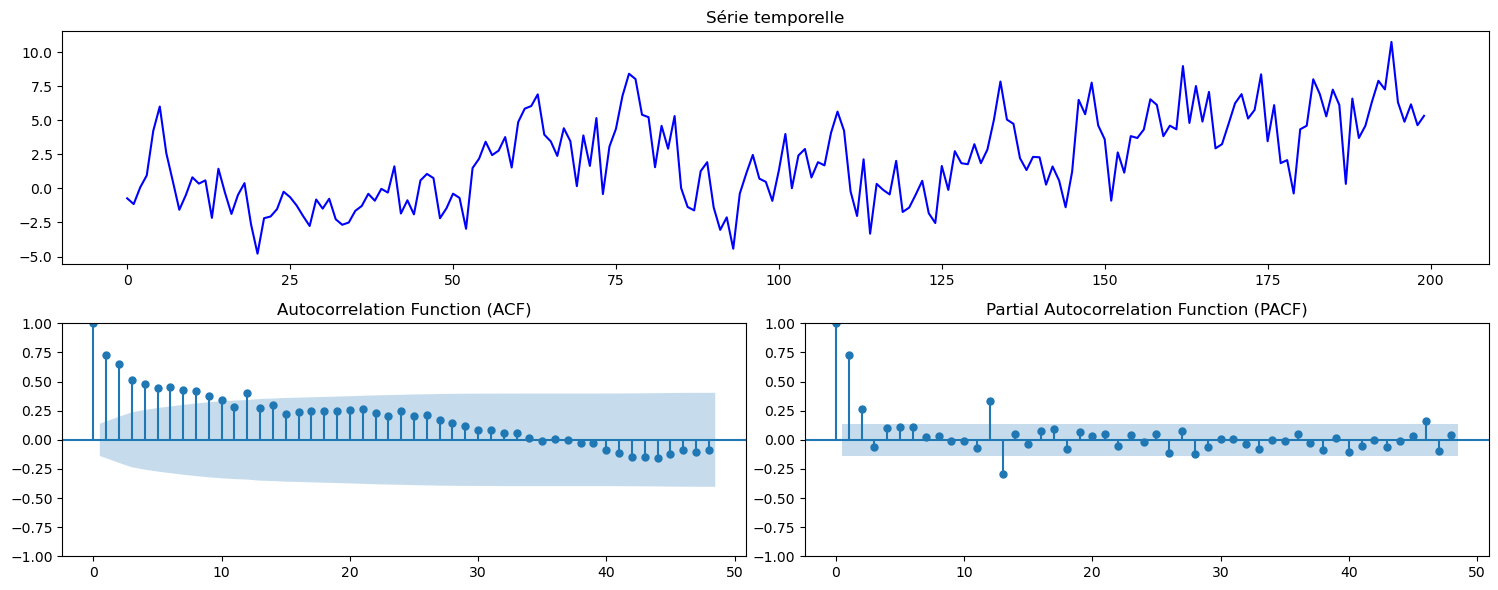

In [60]:
# Paramètres non saisonniers ARMA(1,1)
ar = np.array([1, -0.7])  # AR(1) plus fort
ma = np.array([1, 0.5])   # MA(1) visible

# Générer la partie non saisonnière
arma_process = ArmaProcess(ar, ma)
n = 200
ts_ns = arma_process.generate_sample(nsample=n)

# Ajouter composante saisonnière ARMA(1,1) avec période 12
s = 12
AR_s = np.zeros(s+1)
AR_s[0] = 1
AR_s[-1] = -0.5  # AR saisonnier plus visible
MA_s = np.zeros(s+1)
MA_s[0] = 1
MA_s[-1] = 0.4   # MA saisonnier visible

arma_seasonal = ArmaProcess(AR_s, MA_s)
ts_seasonal = arma_seasonal.generate_sample(nsample=n)

# Combiner composantes et ajouter légère tendance pour visibilité
ts_sarima = ts_ns + ts_seasonal + np.linspace(0, 5, n)

# Visualiser
plot_ts_acf_pacf(ts_sarima, lags=48)


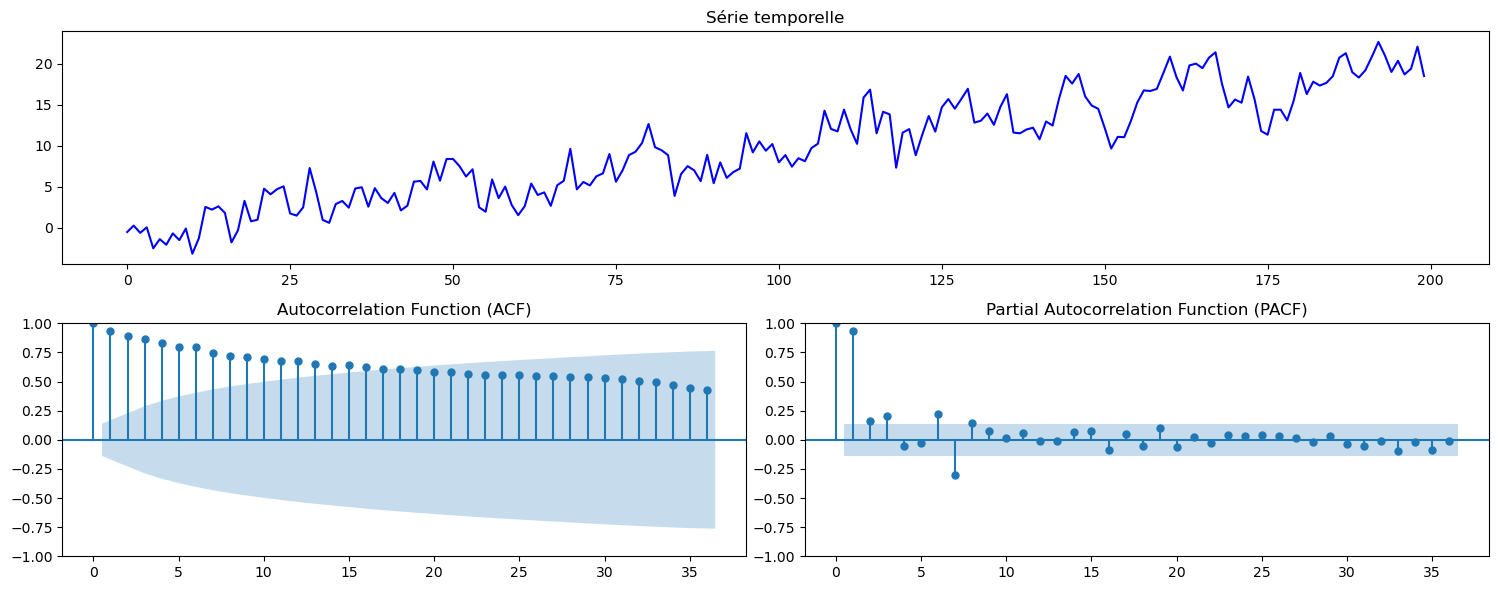

In [65]:
# Paramètres non saisonniers ARMA(1,1)
ar = np.array([1, -0.7])  # AR(1) plus fort
ma = np.array([1, 0.5])   # MA(1) visible

# Générer la partie non saisonnière
arma_process = ArmaProcess(ar, ma)
n = 200
ts_ns = arma_process.generate_sample(nsample=n)

# Ajouter composante saisonnière ARMA(1,1) avec période 12
s = 6
AR_s = np.zeros(s+1)
AR_s[0] = 1
AR_s[-1] = -0.5  # AR saisonnier plus visible
MA_s = np.zeros(s+1)
MA_s[0] = 1
MA_s[-1] = 0.4   # MA saisonnier visible

arma_seasonal = ArmaProcess(AR_s, MA_s)
ts_seasonal = arma_seasonal.generate_sample(nsample=n)

# Combiner composantes et ajouter légère tendance pour visibilité
ts_sarima = ts_ns + ts_seasonal + np.linspace(0, 20, n)

# Visualiser
plot_ts_acf_pacf(ts_sarima, lags=36)
